<a href="https://colab.research.google.com/github/crsanderford/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Connor_Sanderford_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [0]:
# Define some functions

def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

def ttest_report(data1, data2, feature):
  tstat, pvalue = stats.ttest_ind(data1[feature].dropna(), data2[feature].dropna())
  print(f'Feature: {feature}')
  print(f'Difference of Means: {data1[feature].mean() - data2[feature].mean()}')
  print(f'T-Stat:{tstat}')
  print(f'P-Value:{pvalue}')

In [109]:
# Read names
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [0]:
# Read in data, fix the header, set ?s to NA
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, na_values='?')

In [111]:
# Take a look, check row and column count
print(df.shape)
df.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [112]:
# Seeing if our nulls match with the description
df.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [113]:
# Check data types
df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
15     object
dtype: object

In [0]:
# Casting 10 and 14 to float
typedict = {10: float, 14: float}

df = df.astype(dtype = typedict)

In [115]:
df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10    float64
11     object
12     object
13    float64
14    float64
15     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# Getting lists of each feature for each datatype

floatfeatures = df.select_dtypes(include=float).columns.to_list()
objfeatures = df.select_dtypes(include=object).columns.to_list()

# Dropping 15 from objfeatures, as it's the class label.
objfeatures.remove(15)

In [0]:
# Split the dataframe in two along 15
plus = df[(df[15] == '+')]
minus = df[(df[15] == '-')]

In [118]:
plus.describe(include=float)

,1,2,7,10,13,14
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [119]:
plus.describe(include=object)

,0,3,4,5,6,8,9,11,12,15
count,304,303,303,303,303,307,307,307,307,307
unique,2,3,3,14,9,2,2,2,3,1
top,b,u,g,c,v,t,t,f,g,+
freq,206,256,256,62,169,284,209,161,287,307


In [120]:
minus.describe(include=float)

,1,2,7,10,13,14
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [121]:
minus.describe(include=object)

,0,3,4,5,6,8,9,11,12,15
count,374,381,381,378,378,383,383,383,383,383
unique,2,2,2,14,9,2,2,2,3,1
top,b,u,g,c,v,f,f,f,g,-
freq,262,263,263,75,230,306,297,213,338,383


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


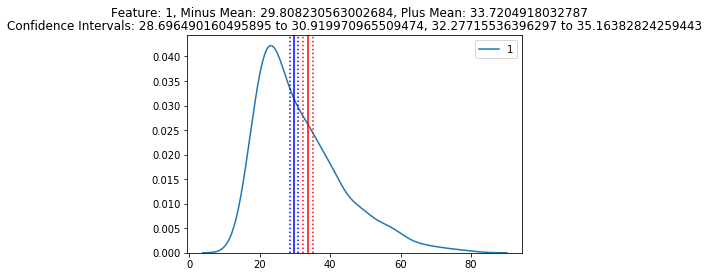

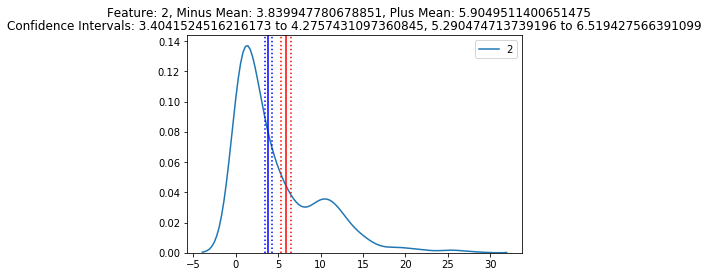

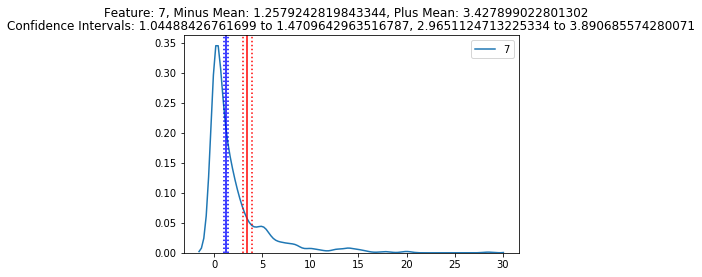

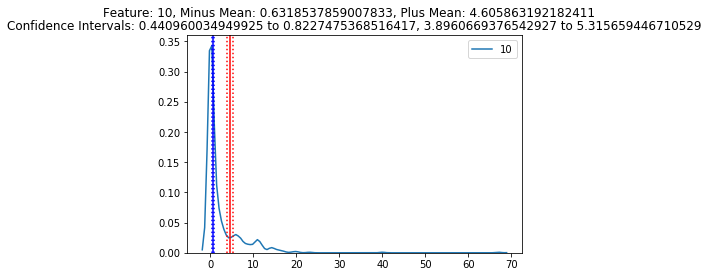

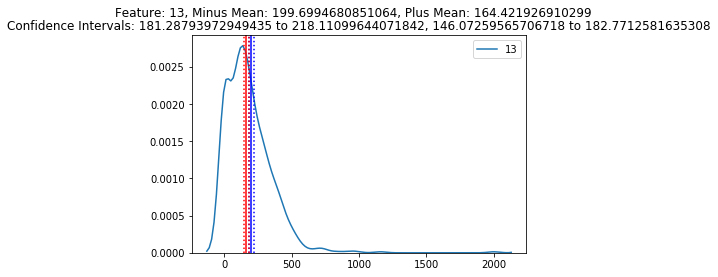

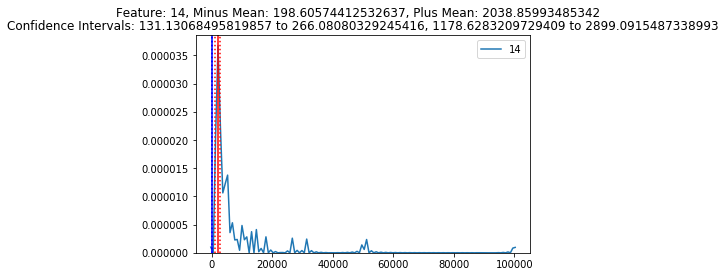

<Figure size 432x288 with 0 Axes>

In [122]:
# Graphical confidence intervals of each float feature

for feat in floatfeatures:
  mmean, mlow, mhigh = confidence_interval(minus[feat].dropna())
  pmean, plow, phigh = confidence_interval(plus[feat].dropna())
  sns.kdeplot(df[feat])
  
  plt.axvline(x=mmean, color='b')
  plt.axvline(x=mlow, color='b', linestyle = ':')
  plt.axvline(x=mhigh, color='b', linestyle = ':')
  
  plt.axvline(x=pmean, color='r')
  plt.axvline(x=plow, color='r', linestyle = ':')
  plt.axvline(x=phigh, color='r', linestyle = ':')
  
  plt.suptitle(f'Feature: {feat}, Minus Mean: {mmean}, Plus Mean: {pmean}')
  plt.title(f'Confidence Intervals: {mlow} to {mhigh}, {plow} to {phigh}')
  plt.figure()

In [123]:
# T-tests of the float features

for feat in floatfeatures:
  ttest_report(minus, plus, feat)
  print('________')

Feature: 1
Difference of Means: -3.912261240276017
T-Stat:-4.2922156166315535
P-Value:2.027663707178064e-05
________
Feature: 2
Difference of Means: -2.065003359386293
T-Stat:-5.52998337614816
P-Value:4.551680702308068e-08
________
Feature: 7
Difference of Means: -2.1699747408169676
T-Stat:-8.935819983773698
P-Value:3.6710537401601785e-18
________
Feature: 10
Difference of Means: -3.9740094062816276
T-Stat:-11.667004222431277
P-Value:7.957718568079967e-29
________
Feature: 13
Difference of Means: 35.277541174807396
T-Stat:2.6358251986645476
P-Value:0.008586135473980122
________
Feature: 14
Difference of Means: -1840.2541907280938
T-Stat:-4.680216020964486
P-Value:3.4520256956287944e-06
________


In [134]:
# Contingency tables for each of the categorical variables
for feat in objfeatures:
  contingency_table = pd.crosstab(df[feat], df[15], margins=True)
  print(f'Feature: {feat}')
  print(contingency_table)
  print('___________')

Feature: 0
15     +    -  All
0                 
a     98  112  210
b    206  262  468
All  304  374  678
___________
Feature: 3
15     +    -  All
3                 
l      2    0    2
u    256  263  519
y     45  118  163
All  303  381  684
___________
Feature: 4
15     +    -  All
4                 
g    256  263  519
gg     2    0    2
p     45  118  163
All  303  381  684
___________
Feature: 5
15     +    -  All
5                 
aa    19   35   54
c     62   75  137
cc    29   12   41
d      7   23   30
e     14   11   25
ff     7   46   53
i     14   45   59
j      3    7   10
k     14   37   51
m     16   22   38
q     51   27   78
r      2    1    3
w     33   31   64
x     32    6   38
All  303  378  681
___________
Feature: 6
15     +    -  All
6                 
bb    25   34   59
dd     2    4    6
ff     8   49   57
h     87   51  138
j      3    5    8
n      2    2    4
o      1    1    2
v    169  230  399
z      6    2    8
All  303  378  681
___________
Feature: 8


In [135]:
# Chi-squared tests for each of the categorical variables

for feat in objfeatures:
  observed = pd.crosstab(df[feat], df[15]).values
  chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
  print(f'Feature: {feat}')
  print(f'Chi-squared: {chi_squared}')
  print(f'P-value: {p_value}')
  print(f'Degrees of freedom: {dof}')
  print('__________')

Feature: 0
Chi-squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of freedom: 1
__________
Feature: 3
Chi-squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of freedom: 2
__________
Feature: 4
Chi-squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of freedom: 2
__________
Feature: 5
Chi-squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of freedom: 13
__________
Feature: 6
Chi-squared: 45.03420714024056
P-value: 3.62545287237226e-07
Degrees of freedom: 8
__________
Feature: 8
Chi-squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of freedom: 1
__________
Feature: 9
Chi-squared: 143.06956205083145
P-value: 5.675727374527571e-33
Degrees of freedom: 1
__________
Feature: 11
Chi-squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of freedom: 1
__________
Feature: 12
Chi-squared: 9.191570451545383
P-value: 0.010094291370456362
Degrees of freedom: 2
__________


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### On T-Tests

A T-test measures the likelihood that the difference between two means is *significant* - that is, not a statistical aberration. The P-value produced by a T-test describes the likelihood that the means of each sample would come from the same population.

The T-tests for all features fell within the 95% bound of significance, though some features have more statistically significant differences than others. We'll look at features 10 and 13.

In [124]:
ttest_report(minus, plus, 10)

Feature: 10
Difference of Means: -3.9740094062816276
T-Stat:-11.667004222431277
P-Value:7.957718568079967e-29


In [125]:
ttest_report(minus, plus, 13)

Feature: 13
Difference of Means: 35.277541174807396
T-Stat:2.6358251986645476
P-Value:0.008586135473980122


In this case T-tests represent the odds that the difference in the means between the minus and plus groups are significant. Feature 10's low p-value indicates that the difference in means for the two groups with regard to feature 10 is very likely to be significant, and therefore that the correlation is likely to be significant.

On the other hand, Feature 13's higher (though still significant!) p-value indicates lower odds that the difference in means for the two groups with regard to feature 13 is significant, and therefore that the correlation between the features is less likely to be significant.

### On Chi-Squared Tests

A chi-squared test measures the likelihood that two categorical variables are dependent on one another. The p-value of a chi-squared test represents the likelihood that the variables are independent from one another.

Some features were clearly dependent, whereas others were not. We'll look at features 8 and 11.

In [132]:
observed = pd.crosstab(df[8], df[15]).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f'Feature: {8}')
print(f'Chi-squared: {chi_squared}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print('__________')

Feature: 8
Chi-squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of freedom: 1
__________


In [133]:
observed = pd.crosstab(df[11], df[15]).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f'Feature: {11}')
print(f'Chi-squared: {chi_squared}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')
print('__________')

Feature: 11
Chi-squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of freedom: 1
__________


In this case, p-values indicate the odds that the dependency observed between the given feature and the class is a statistical aberration. A low p-value therefore indicates a low likelihood of independence.

Feature 8's *exceptionally* low p-value indicates that that it is extremely unlikely that the dependency observed between the class and the feature is a matter of random chance, and that it is therefore very likely there is dependency between feature 8 and the class.

Feature 11, on the other hand, has a high p-value, indicating that it is not at all unlikely that the dependency observed between the class and that feature is simply random chance. Therefore it's quite likely that feature 11 and the class are independent of one another.